In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [2]:
df = pd.read_csv('../data/All_combined.csv', parse_dates=['Date'], dtype={'Currency_Name': pd.StringDtype()})

# Análise inicial

Não existem valores nulos entre os dados

In [3]:
df.isnull().values.any()

False

O período de amostragem vai de 18 de julho de 2010 a 24 de agosto de 2021

In [4]:
df['Date'].min()

Timestamp('2010-07-18 00:00:00')

In [5]:
df['Date'].max()

Timestamp('2021-08-24 00:00:00')

Lista das criptomoedas analisadas

In [6]:
df['Currency_Name'].unique()

<StringArray>
[            'Aave',         'Algorand',        'Avalanche',
    'Axie_Infinity',     'Binance_Coin',      'Binance_USD',
          'Bitcoin',     'Bitcoin_BEP2',     'Bitcoin_Cash',
       'Bitcoin_SV',       'BitTorrent',          'Cardano',
        'Chainlink',           'Cosmos',  'Crypto.com_Coin',
              'Dai',             'Dash',         'Dogecoin',
           'Elrond',              'EOS',         'Ethereum',
 'Ethereum_Classic',         'Filecoin',        'FTX_Token',
              'GRT',              'ICP',             'IOTA',
           'Klaytn',           'Kusama',              'LEO',
         'Litecoin',            'Maker',           'Monero',
              'Neo',      'PancakeSwap',         'Polkadot',
          'Polygon',        'SHIBA_INU',           'Solana',
          'Stellar',           'Tether',            'Tezos',
            'THETA',             'Tron',          'Uniswap',
         'USD_Coin',          'VeChain',            'Waves',
          

# Tarefas

## Em qual dia houve maior alta e maior baixa?

In [7]:
change_by_currency = df.groupby('Currency_Name')['Change %']

### Em qual período as valorizações se concentram?

<AxesSubplot:title={'center':'Histograma 1 - valorizações máximas de todo DataFrame'}>

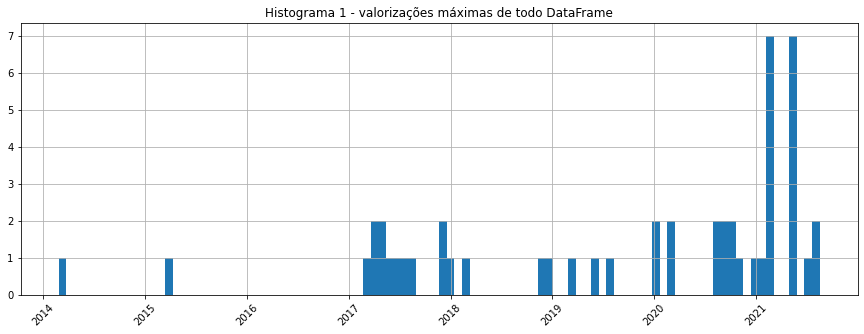

In [8]:
plt.title("Histograma 1 - valorizações máximas de todo DataFrame")
df.loc[change_by_currency.idxmax(), 'Date'].hist(xrot=45, bins=100, figsize=(15, 5))

De acordo com o Histograma 1, existe uma concentração das altas no ano de 2021. Vamos analisar com mais detalhes esse período.

In [9]:
grouped_change_2021 = df[df['Date'].dt.year == 2021].groupby('Currency_Name')['Change %']

<AxesSubplot:title={'center':'Histograma 2 - valorizações máximas de 2021'}>

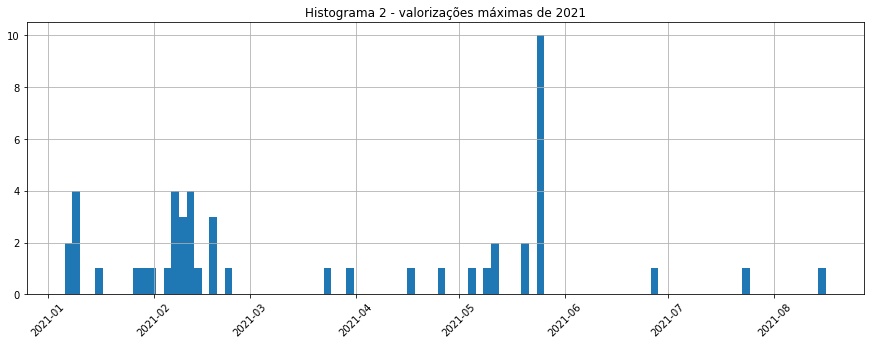

In [10]:
plt.title('Histograma 2 - valorizações máximas de 2021')
df.loc[grouped_change_2021.idxmax(), 'Date'].hist(xrot=45, bins=100, figsize=(15, 5))

É possível identificar uma concentração das máximas no mês de maio. No Histograma 1 as máximas do inicio de 2021 se somam e aparecem como outra concentração, mas que o Histograma 2 revela que se trata de máxima mais dispersas.
Por se tratar de uma concentração expressiva das máximas, vamos analisar as valorizações que ocorreram no mês de maio de 2021.

In [11]:
maximas = df.loc[grouped_change_2021.idxmax(), ['Date', 'Currency_Name', 'Change %']]
maximas = maximas[('2021-05' <= maximas['Date']) & (maximas['Date'] <= '2021-06')]

In [12]:
maximas.sort_values('Change %', ascending=False)

,Date,Currency_Name,Change %
39136,2021-05-24,Polygon,59.83
21978,2021-05-11,EOS,56.18
9366,2021-05-05,Bitcoin_Cash,52.83
47191,2021-05-24,Uniswap,47.46
25839,2021-05-24,Ethereum_Classic,42.64
36368,2021-05-20,Monero,40.80
30048,2021-05-24,Kusama,33.30
13818,2021-05-24,Chainlink,32.68
39241,2021-05-24,SHIBA_INU,31.56
1182,2021-05-24,Aave,31.19


In [13]:
maximas[maximas['Date'] == '2021-05-24'].count()

Date             10
Currency_Name    10
Change %         10
dtype: int64

93

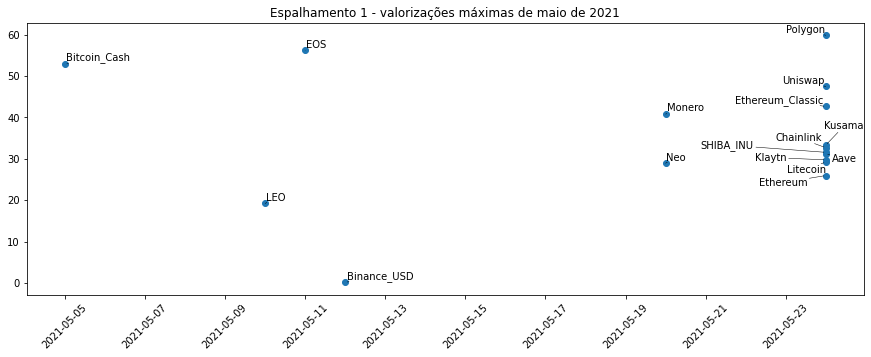

In [14]:
X = maximas['Date'].to_list()
Y = maximas['Change %'].to_list()
annotations = maximas['Currency_Name'].to_list()

plt.figure(figsize=(15, 5))
plt.xticks(rotation=45)
plt.scatter(X, Y)
plt.title("Espalhamento 1 - valorizações máximas de maio de 2021")
texts = [plt.text(X[i], Y[i], annotations[i]) for i in range(len(X))]
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5))

Podemos observar pelo gráfico de espalhamento e pelos dados que
 * a Polygon teve a maior máxima (59,83 %), seguida pela EOS (56,18 %) e Bitcoin_Cash (52,83 %)
 * a valorização da Polygon está fortemente relacionada com um fenômeno de alta geral das criptomoedas já que ela está acompanhada pelas máximas de outras dez criptomoedas que ocorreram no mesmo dia (24 de maio)
 * as máximas da Bitcoin_Cash e da EOS são indícios de grande valorização das criptomoedas em geral, apesar de não fazerem diretamente parte do fenômeno de valorização ocorrido no dia 24

### Em qual período as desvalorizações se concentram?

<AxesSubplot:title={'center':'Histograma 3 - desvalorizações máximas de todo DataFrame'}>

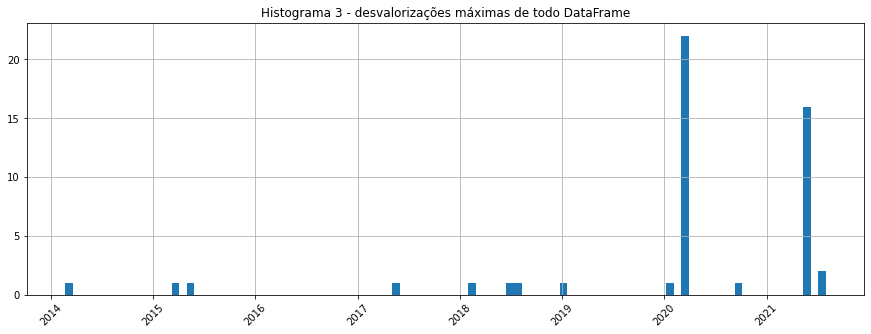

In [15]:
plt.title("Histograma 3 - desvalorizações máximas de todo DataFrame")
df.loc[change_by_currency.idxmin(), 'Date'].hist(xrot=45, bins=100, figsize=(15, 5))

Podemos perceber que houveram concentração de desvalorização no primeiro semestre de 2020 e no ano de 2021. Primeiro vamo investigar com mais detalhes o ano de 2020.

#### Desvalorizações de 2020

In [16]:
grouped_change_2020 = df[(df['Date'] >= '2020-01') & (df['Date'] <= '2020-07')].groupby('Currency_Name')['Change %']

<AxesSubplot:title={'center':'Histrograma 4 - desvalorizações máximas no primeiro semestre de 2020'}>

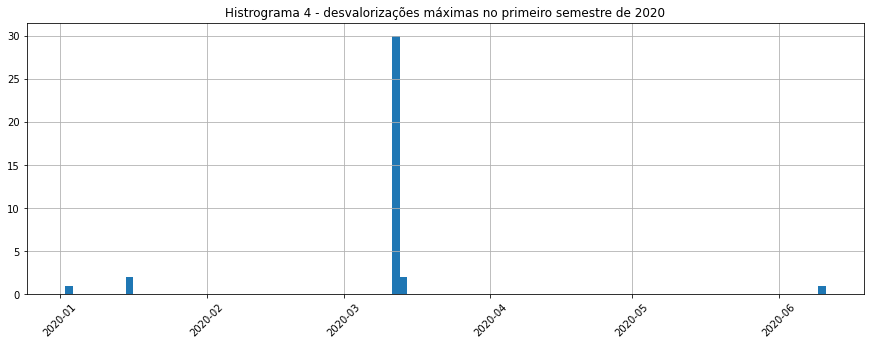

In [17]:
plt.title("Histrograma 4 - desvalorizações máximas no primeiro semestre de 2020")
df.loc[grouped_change_2020.idxmin(), 'Date'].hist(xrot=45, bins=100, figsize=(15, 5))

In [18]:
minimas_2020 = df.loc[grouped_change_2020.idxmin(), ['Date', 'Currency_Name', 'Change %']]
minimas_2020 = minimas_2020[('2020-03' <= minimas_2020['Date']) & (minimas_2020['Date'] <= '2020-04')]

In [19]:
minimas_2020['Date'].unique()

array(['2020-03-12T00:00:00.000000000', '2020-03-13T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [20]:
minimas_2020[minimas_2020['Date'] == '2020-03-12'].count()

Date             30
Currency_Name    30
Change %         30
dtype: int64

In [21]:
minimas_2020.sort_values('Change %')

,Date,Currency_Name,Change %
33535,2020-03-12,Maker,-60.03
38698,2020-03-12,Polygon,-51.94
1506,2020-03-12,Algorand,-50.11
49159,2020-03-12,VeChain,-48.75
45081,2020-03-12,THETA,-47.73
13380,2020-03-12,Chainlink,-47.20
9957,2020-03-12,Bitcoin_SV,-46.35
14213,2020-03-12,Cosmos,-45.91
43786,2020-03-12,Tezos,-45.91
8947,2020-03-12,Bitcoin_Cash,-44.99


Com o Histograma 4 e os dados exibidos podemos concluir que
 * a grande campeã de desvalorização é a Maker (-60,03 %)
 * houve um fenômeno de desvalorização concentrada das criptomoedas no dia 12 de março, que reverberou no dia seguinte
 * Polygon, EOS e Bitcoin_Cash figuram entre as criptomoedas que sofreram as maiores baixas, com -51,94 %, -41,99 % e -44,99 % respectivamente

In [14]:
df

,Currency_Name,Date,Price,Open,High,Low,Vol.,Change %
0,Aave,2018-01-30,0.15000,0.17000,0.17000,0.14000,530470.0,-7.95
1,Aave,2018-01-31,0.14000,0.15000,0.15000,0.13000,396050.0,-11.10
2,Aave,2018-02-01,0.11000,0.14000,0.14000,0.11000,987260.0,-17.46
3,Aave,2018-02-02,0.10000,0.11000,0.11000,0.08000,1810000.0,-8.32
4,Aave,2018-02-03,0.11000,0.10000,0.12000,0.09000,1200000.0,6.85
...,...,...,...,...,...,...,...,...
53830,XPR,2015-01-26,0.01469,0.01700,0.01750,0.01469,0.0,-13.59
53831,XPR,2015-01-25,0.01700,0.01739,0.01739,0.01560,0.0,-2.24
53832,XPR,2015-01-24,0.01739,0.01600,0.01739,0.01500,0.0,8.69
53833,XPR,2015-01-23,0.01600,0.01602,0.01700,0.01600,0.0,-0.12
